# E-Learning Platform: The best markets to advertise

The courses cover web and mobile development, data science, game development etc.  
We want to find out which two markets are the best to advertise our product.

## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Dataset

In [3]:
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', dtype={'CodeEventOther': object, 
                                                                'JobInterestOther': object})
fcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Why not conduct our own survey?

With more than 18.000 survey responses freeCodeCamp's (from now on fCC) survey data saves us a lot of time.
Members of dozens of coding-related organizations publicized it to their members who altogether make up a group that should be diverse and at the same time focused enough to cover our target audience. (We'll check this assumption in the following section.)

The fCC dataset has a total of 136 columns consisting of personal questions, learning behavior, job expectations and used learning resources which make up about 90% of all the columns.  

The dataset is publicly available here: https://github.com/freeCodeCamp/2017-new-coder-survey

### Is the group of survey participants representative for our population of interest? 

In [5]:
pd.DataFrame(fcc.JobRoleInterest.value_counts(dropna = False) * 100)

,JobRoleInterest
NaN,1118300
Full-Stack Web Developer,82300
Front-End Web Developer,45000
Data Scientist,15200
Back-End Web Developer,14200
Mobile Developer,11700
Game Developer,11400
Information Security,9200
"Full-Stack Web Developer, Front-End Web Developer",6400
"Front-End Web Developer, Full-Stack Web Developer",5600


The frequency table of the ```JobRoleInterest``` column reveals that that this question is multi-choice.  
To extract useful insight from this column we need to split each value to be able to do analysis based on individual subjects.

In [6]:
interest_replies = fcc.JobRoleInterest.count()
print('Number of participants who shared their Job Role Interest:', interest_replies)

Number of participants who shared their Job Role Interest: 6992


**Number of interested subjects**

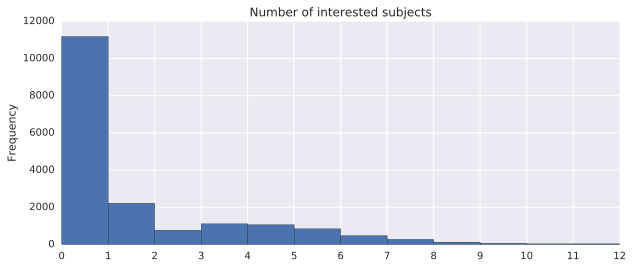

In [7]:
fcc['JobRoleInterestCount'] = (fcc['JobRoleInterest'].str.count(",") + 1).replace(np.nan, 0).astype(int)
max_count = fcc['JobRoleInterestCount'].max()
plt.figure(figsize=(10,4))
fcc['JobRoleInterestCount'].plot.hist(bins = range(max_count))
plt.title('Number of interested subjects')
plt.xticks(range(max_count));

**Most desired Job Roles**

In [8]:
def map_list_value(fn, delimiter = ','):
    def map_items(value):
        subjects = str(value).split(delimiter)
        return fn(subjects)
    return map_items

In [9]:
subject_counts_dict = {}

def update_dict(subjects):
    for subject in subjects:
        subj = subject.strip()
        prev = subject_counts_dict.get(subj, 0)
        subject_counts_dict[subj] = prev + 1

fcc['JobRoleInterest'].apply(map_list_value(update_dict))

subject_counts = pd.Series(subject_counts_dict, name='times selected')
pd.DataFrame(subject_counts.sort_values(ascending = False))

,times selected
nan,11183
Full-Stack Web Developer,4198
Front-End Web Developer,3533
Back-End Web Developer,2772
Mobile Developer,2304
Data Scientist,1643
Game Developer,1628
User Experience Designer,1469
Information Security,1326
Data Engineer,1248


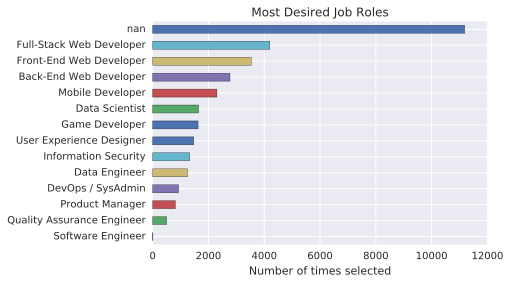

In [10]:
top_subjects = subject_counts[subject_counts > 10].sort_values()
top_subjects.plot.barh(title = 'Most Desired Job Roles');
plt.xlabel('Number of times selected');

**Interest in course topics we provide**

In [11]:
course_focus = ['Full-Stack Web Developer', 'Front-End Web Developer', 'Back-End Web Developer', 'Mobile Developer']
    
includes_focus_subject = lambda subjects: any([subj.strip() in course_focus for subj in subjects])

fcc['InterestInOurSubjects'] = fcc['JobRoleInterest'].apply(map_list_value(includes_focus_subject))

pct_interest_replies = '({:.2%})'.format(interest_replies / len(fcc))
print('Participants who provided data on their job role interest:      ', interest_replies, pct_interest_replies)
num_interested = fcc['InterestInOurSubjects'].sum()
pct_course_subjects = '({:.2%})'.format(num_interested / len(fcc))
print('Participants interested in at least one of our course subjects: ', num_interested, pct_course_subjects)
print('\nPercentag of non-empty replies including our course subjects:    {:.2%}'.format(num_interested / interest_replies))

Participants who provided data on their job role interest:       6992 (38.47%)
Participants interested in at least one of our course subjects:  6030 (33.18%)

Percentag of non-empty replies including our course subjects:    86.24%


We found that 86% of the people who provided data on their Job Role Interest chose at least one of our course subjects.  
Our main subjects are without exception the most sought after within this dataset.  
In absolute numbers that's 6030 survey replies constituting a sample that is highly representative for our population of interest.

## Where are our potential customers located?

In [12]:
fcc_filtered = fcc[~fcc.JobRoleInterest.isna()].copy()

fcc_location = fcc_filtered.CountryLive
location_freq = pd.concat({
        'count': fcc_location.value_counts(), 
        'pct': (fcc_location.value_counts(normalize = True) * 100).map('{:.1f}'.format)
    }, axis = 1)
location_freq.head(10)

,count,pct
United States of America,3125,45.7
India,528,7.7
United Kingdom,315,4.6
Canada,260,3.8
Poland,131,1.9
Brazil,129,1.9
Germany,125,1.8
Australia,112,1.6
Russia,102,1.5
Ukraine,89,1.3


## How much money have students spent for learning?

Moving forward we'll focus our analysis on the markets in the USA, India, UK and Canada.  
These are the countries with the most students in this dataset, so we'll have plenty of data to work with.  
English is the official language in all these four countries which means that we can use ads in English for all four countries. 

In [13]:
focus_countries = location_freq.index[:4]
print(focus_countries)
fcc_filtered = fcc_filtered[fcc_filtered['CountryLive'].isin(focus_countries)]
fcc_filtered[['MoneyForLearning', 'MonthsProgramming']].head()

Index(['United States of America', 'India', 'United Kingdom', 'Canada'], dtype='object')


,MoneyForLearning,MonthsProgramming
1,80.0,6.0
2,1000.0,5.0
6,0.0,12.0
13,NaN,NaN
14,NaN,9.0


In [14]:
fcc_filtered['MonthsProgramming'].replace(0, 1, inplace = True)

fcc_filtered['MoneySpentPerMonth'] = fcc_filtered['MoneyForLearning'] / fcc_filtered['MonthsProgramming']

money_and_location = ~fcc_filtered['MoneySpentPerMonth'].isna() & ~fcc_filtered['CountryLive'].isna()
fcc_filtered = fcc_filtered[money_and_location]
fcc_filtered.shape

(3915, 139)

In [15]:
mean_money_avg = fcc_filtered['MoneySpentPerMonth'].mean()

def group_country(data):
    return data.groupby('CountryLive')

def print_groupby_stats(data):
    grouped = group_country(data)['MoneySpentPerMonth']
    print(grouped.agg(['count', 'mean', 'min', 'median', 'max']).sort_values('mean', ascending = False))
    
def plot_groupby_kde(data, **kwargs):
    grouped = group_country(data)['MoneySpentPerMonth']
    ax = grouped.plot.kde(legend = True, **kwargs);
    return ax
    
def boxplot_money_spent(data, **kwargs):
    ax = sns.boxplot(x='CountryLive', y='MoneySpentPerMonth', data=data, **kwargs)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=-45);
    ax.set_xlabel('')
    ax.set_ylabel('');
    return ax
    
def print_stats_and_graphs(data, kde_xlim=(0, 500)):
    print_groupby_stats(data)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    fig.suptitle('Money Spent Per Month (USD / mo)', fontsize=12)
    boxplot_money_spent(data, ax=axes[0])
    plot_groupby_kde(data, ax=axes[1], xlim=kde_xlim)
    

### Money spent per month | with outliers

                          count        mean  min    median      max
CountryLive                                                        
United States of America   2933  227.997996  0.0  3.333333  80000.0
India                       463  135.100982  0.0  0.000000  10000.0
Canada                      240  113.510961  0.0  0.000000   5000.0
United Kingdom              279   45.534443  0.0  0.000000   1400.0


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



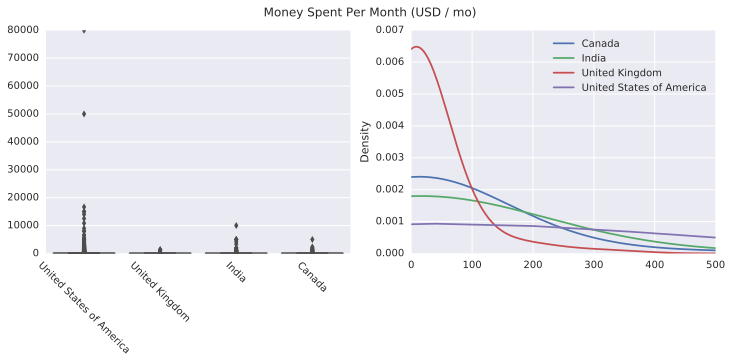

In [16]:
print_stats_and_graphs(fcc_filtered)

### Money spent per month | only less than 10000

                          count        mean  min    median      max
CountryLive                                                        
United States of America   2925  155.459187  0.0  3.333333   9000.0
India                       463  135.100982  0.0  0.000000  10000.0
Canada                      240  113.510961  0.0  0.000000   5000.0
United Kingdom              279   45.534443  0.0  0.000000   1400.0


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



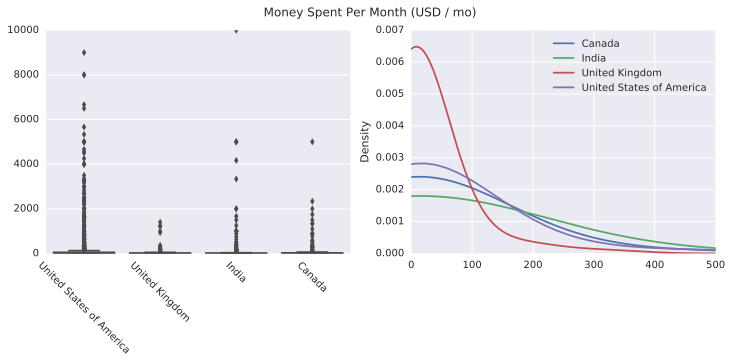

In [17]:
valid_range = (fcc_filtered.MoneySpentPerMonth >= 0) & (fcc_filtered.MoneySpentPerMonth <= 10000)
fcc_no_outliers = fcc_filtered[valid_range]

print_stats_and_graphs(fcc_no_outliers)

### Money spent per month | only less than 5000

                          count        mean  min    median     max
CountryLive                                                       
United States of America   2918  138.982678  0.0  3.333333  5000.0
India                       462  113.748387  0.0  0.000000  5000.0
Canada                      240  113.510961  0.0  0.000000  5000.0
United Kingdom              279   45.534443  0.0  0.000000  1400.0


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



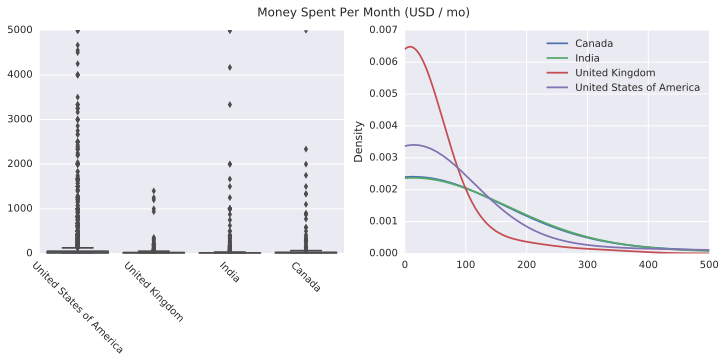

In [22]:
valid_range = (fcc_filtered.MoneySpentPerMonth >= 0) & (fcc_filtered.MoneySpentPerMonth <= 5000)
fcc_no_outliers = fcc_filtered[valid_range]

print_stats_and_graphs(fcc_no_outliers)

### Money spent per month | taking a closer look

After removing extreme outliers in the ```MoneySpentPerMonth``` uniformly across all countries the result is still not satisfactory.  
Especially data for India and Canada still present relatively extreme outliers.  
Sorting out individual datapoints across all countries and deciding whether they should be part of the sample is time-consuming and might introduce bias, so we try to establish a general rule deciding whether an amount of monthly expenses is justified or not.  

Unjustified expenses after our definition are those higher than 2000 if no bootcamp was attended  
or the respondent had been programming for less than or equal to 3 months (which could result in unreasonably high values for ```MoneySpentPerMonth```) 

In [25]:
high_expense_no_bootcamp_bool = (
    (fcc_filtered.MoneySpentPerMonth > 2000) & 
    (fcc_filtered.AttendedBootcamp == 0)
)
high_expense_few_months_programming = (
    (fcc_filtered.MoneySpentPerMonth > 2000) & 
    (fcc_filtered.MonthsProgramming <= 3)
)

unjustified_expense_bool = high_expense_no_bootcamp_bool | high_expense_few_months_programming

unjustified_expense = fcc_filtered[unjustified_expense_bool].sort_values('MoneySpentPerMonth', ascending = False)

expense_detail_cols = ['CountryLive', 'MoneySpentPerMonth', 'MonthsProgramming', 'AttendedBootcamp']

unjustified_expense[expense_detail_cols] \
    .sort_values(expense_detail_cols, ascending=[True, False, True, True])

,CountryLive,MoneySpentPerMonth,MonthsProgramming,AttendedBootcamp
13659,Canada,5000.000000,2.0,1.0
13398,India,10000.000000,2.0,0.0
7989,India,5000.000000,1.0,0.0
8126,India,5000.000000,1.0,0.0
1728,India,5000.000000,4.0,0.0
15587,India,4166.666667,24.0,0.0
1755,India,3333.333333,15.0,0.0
14024,United States of America,80000.000000,1.0,0.0
2478,United States of America,50000.000000,2.0,1.0
16650,United States of America,16666.666667,12.0,0.0


                          count        mean  min    median          max
CountryLive                                                            
United States of America   2898  113.397673  0.0  2.916667  4000.000000
Canada                      239   93.065400  0.0  0.000000  2337.166667
India                       457   65.758763  0.0  0.000000  2000.000000
United Kingdom              279   45.534443  0.0  0.000000  1400.000000


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



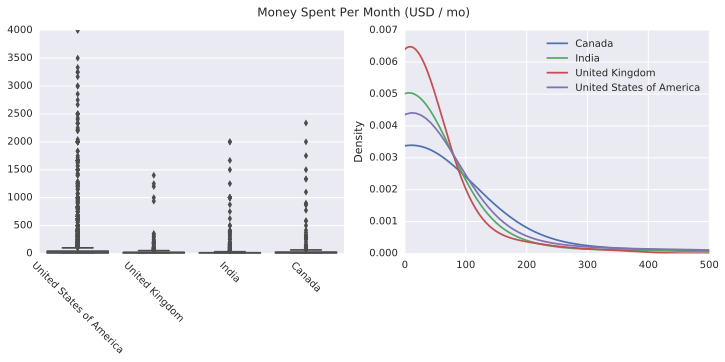

In [26]:
only_justified_expense = fcc_filtered[~unjustified_expense_bool][expense_detail_cols]
print_stats_and_graphs(only_justified_expense)

In [40]:
grouped_justified_expense = only_justified_expense.groupby('CountryLive')['MoneySpentPerMonth']
print('Pct. spending 100 USD / mo or more')
print(grouped_justified_expense.apply(lambda x: x[x >= 59].count() / x.count() * 100))
print('\nPct. living in the country')
print(grouped_justified_expense.apply(lambda x: len(x) / len(only_justified_expense) * 100).sort_values(ascending = False))

Pct. spending 100 USD / mo or more
CountryLive
Canada                      16.317992
India                       15.098468
United Kingdom              15.412186
United States of America    21.704624
Name: MoneySpentPerMonth, dtype: float64

Pct. living in the country
CountryLive
United States of America    74.825716
India                       11.799639
United Kingdom               7.203718
Canada                       6.170927
Name: MoneySpentPerMonth, dtype: float64


## The best markets for advertisement
In the cases of all countries the median value for monthly learning expenses is zero or close to zero.  
However, there is still a group of at least 15% in every country spending more than 100 USD / mo for learning.  

With a mean of 114 USD and 93 USD respectively, coding students in the US and Canada are spending the most.  
Coding students in India have the highest frequency in our sample and spend 66 USD / mo on average.
The UK appears to be the worst market for advertising our premium product as coding students who live there spend only 46 USD / mo on average for learning and they also make up a relatively small portion of the total number of respondents.  

The US is the recommended market to advertising our product - 75% of the coding students in our sample live there and they are also prepared to pay the most.
Depending on our preferred strategy I further recommend advertising our product either in Canada or India.  
Canada has the smallest portion of coding students but they are prepared to spend the second most on learning.
India has roughly twice the number of coding students but they are paying only 70% of what students in Canada are paying on average.